### Load Simulated daily and simulated 5-minute data

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from arch import arch_model
import pandas_ta
import os

data_folder = "C:/Users/codyr/Desktop/Coding_/Quant_Trading_Basics"

daily_df = pd.read_csv(os.path.join(data_folder, "simulated_daily_data.csv"))

daily_df['Date'] = pd.to_datetime(daily_df['Date'])

daily_df = daily_df.set_index('Date')

daily_df['log_ret'] = np.log(daily_df['Adj Close']).diff()

daily_df = daily_df.drop('Unnamed: 7', axis=1)

intraday_5min_df = pd.read_csv(os.path.join(data_folder, 'simulated_5min_data.csv'))

intraday_5min_df['datetime'] = pd.to_datetime(intraday_5min_df['datetime'])

intraday_5min_df = intraday_5min_df.set_index('datetime')

intraday_5min_df['date'] = intraday_5min_df.index.date

intraday_5min_df = intraday_5min_df.drop('Unnamed: 6', axis=1)

intraday_5min_df

,open,low,high,close,volume,date
datetime,,,,,,
2021-09-29 20:00:00,10379.7775,10364.5950,10398.7025,10370.9575,46,2021-09-29
2021-09-29 20:05:00,10370.9425,10352.4175,10380.2500,10371.1450,53,2021-09-29
2021-09-29 20:10:00,10372.8150,10357.8250,10388.7500,10384.3125,116,2021-09-29
2021-09-29 20:15:00,10385.8275,10384.0825,10457.2000,10442.5175,266,2021-09-29
2021-09-29 20:20:00,10442.5225,10426.2375,10448.0000,10440.9950,65,2021-09-29
...,...,...,...,...,...,...
2023-09-20 10:40:00,6792.1025,6783.6000,6796.2500,6790.1375,41,2023-09-20
2023-09-20 10:45:00,6790.5575,6779.1000,6795.7500,6781.9175,42,2023-09-20
2023-09-20 10:50:00,6781.5475,6779.3750,6790.2500,6783.9050,44,2023-09-20


### Define a function to fit GARCH model and predict 1-day ahead volatility in a rolling window.

In [36]:
daily_df['variance'] = daily_df['log_ret'].rolling(180).var()

daily_df = daily_df['2020-01-01':]

def predict_volatility(x):

    best_model = arch_model(y=x,
                            p=1,
                            q=3).fit(update_freq=5, disp='off')

    variance_forecast = best_model.forecast(horizon=1).variance.iloc[-1, 0]

    # print(x.index[-1])
    
    return variance_forecast

daily_df['predictions'] = daily_df['log_ret'].rolling(180).apply(lambda x: predict_volatility(x))

daily_df

C:\Users\codyr\Desktop\Coding_\Quant_Trading_Basics\venv\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002459. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\codyr\Desktop\Coding_\Quant_Trading_Basics\venv\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002459. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\codyr\D

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions
Date,,,,,,,,,
2020-01-01,1798.723022,1813.582642,1793.736084,1800.043579,1800.043579,1.856566e+10,0.000914,NaN,NaN
2020-01-02,1800.637817,1803.038818,1733.817505,1746.367554,1746.367554,2.080208e+10,-0.030273,NaN,NaN
2020-01-03,1746.107178,1853.428833,1728.749023,1836.221069,1836.221069,2.811148e+10,0.050172,NaN,NaN
2020-01-04,1836.343872,1856.846436,1827.378540,1852.664185,1852.664185,1.844427e+10,0.008915,NaN,NaN
2020-01-05,1852.612915,1886.124268,1850.133911,1852.829346,1852.829346,1.972507e+10,0.000089,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-09-14,6557.069336,6693.655762,6542.862793,6634.918457,6634.918457,1.381136e+10,0.011801,0.000393,0.000334
2023-09-15,6633.454590,6710.124512,6560.175293,6652.173340,6652.173340,1.147974e+10,0.002597,0.000385,0.000292
2023-09-16,6651.549805,6688.692383,6618.472656,6642.070313,6642.070313,7.402031e+09,-0.001520,0.000384,0.000286


In [28]:
daily_df['predictions'] = daily_df['predictions']/100

<Axes: xlabel='Date'>

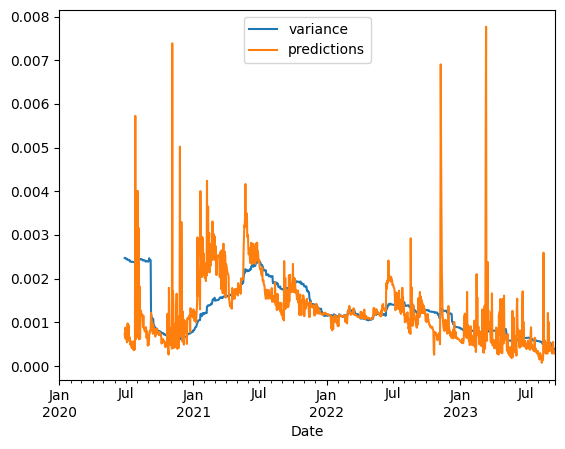

In [37]:
daily_df[['variance', 'predictions']].plot()

###  Calculate prediction premium and for a daily signal from it

In [46]:
daily_df['prediction_premium'] = (daily_df['predictions']-daily_df['variance'])/daily_df['variance']

daily_df['premium_std'] = daily_df['prediction_premium'].rolling(180).std()

daily_df['daily_signal'] =  daily_df.apply(lambda x: 1 if (x['prediction_premium']>x['premium_std']*1.5)
                                           else (-1 if (x['prediction_premium']<x['premium_std']*1.5)
                                                        else np.nan),
                                                        axis=1)

daily_df['daily_signal'] = daily_df['daily_signal'].shift()

daily_df

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions,prediction_premium,premium_std,daily_signal
Date,,,,,,,,,,,,
2020-01-01,1798.723022,1813.582642,1793.736084,1800.043579,1800.043579,1.856566e+10,0.000914,NaN,NaN,NaN,NaN,NaN
2020-01-02,1800.637817,1803.038818,1733.817505,1746.367554,1746.367554,2.080208e+10,-0.030273,NaN,NaN,NaN,NaN,NaN
2020-01-03,1746.107178,1853.428833,1728.749023,1836.221069,1836.221069,2.811148e+10,0.050172,NaN,NaN,NaN,NaN,NaN
2020-01-04,1836.343872,1856.846436,1827.378540,1852.664185,1852.664185,1.844427e+10,0.008915,NaN,NaN,NaN,NaN,NaN
2020-01-05,1852.612915,1886.124268,1850.133911,1852.829346,1852.829346,1.972507e+10,0.000089,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-14,6557.069336,6693.655762,6542.862793,6634.918457,6634.918457,1.381136e+10,0.011801,0.000393,0.000334,-0.151792,0.549073,-1.0
2023-09-15,6633.454590,6710.124512,6560.175293,6652.173340,6652.173340,1.147974e+10,0.002597,0.000385,0.000292,-0.240810,0.546370,-1.0
2023-09-16,6651.549805,6688.692383,6618.472656,6642.070313,6642.070313,7.402031e+09,-0.001520,0.000384,0.000286,-0.256793,0.545350,-1.0


### Merge with intraday data and calculate intraday indicators to form the intraday signal

In [59]:
intraday_5min_df['date'] = pd.to_datetime(intraday_5min_df['date'])

In [60]:
daily_df[['daily_signal']].reset_index()['Date']

0      2020-01-01
1      2020-01-02
2      2020-01-03
3      2020-01-04
4      2020-01-05
          ...    
1352   2023-09-14
1353   2023-09-15
1354   2023-09-16
1355   2023-09-17
1356   2023-09-18
Name: Date, Length: 1357, dtype: datetime64[ns]

In [61]:
intraday_5min_df['date']

datetime
2021-09-29 20:00:00   2021-09-29
2021-09-29 20:05:00   2021-09-29
2021-09-29 20:10:00   2021-09-29
2021-09-29 20:15:00   2021-09-29
2021-09-29 20:20:00   2021-09-29
                         ...    
2023-09-20 10:40:00   2023-09-20
2023-09-20 10:45:00   2023-09-20
2023-09-20 10:50:00   2023-09-20
2023-09-20 10:55:00   2023-09-20
2023-09-20 11:00:00   2023-09-20
Name: date, Length: 177877, dtype: datetime64[ns]

In [75]:
# final_df = intraday_5min_df.reset_index()\
# .merge(daily_df[['daily_signal']].reset_index(),
#       left_on='date',
#       right_on='Date')\
# .set_index('datetime')

# final_df = final_df.drop(['date', 'Date'], axis=1)

# final_df['rsi'] = pandas_ta.rsi(close=final_df['close'],
#                                 length=20)

# final_df['lband'] = pandas_ta.bbands(close=final_df['close'],
#                                 length=20).iloc[:,0]

# final_df['uband'] = pandas_ta.bbands(close=final_df['close'],
#                                 length=20).iloc[:,2]

# final_df['signal_intraday'] = final_df.apply(lambda x: 1 if (x['rsi']>70)&(x['close']>x['uband'])
#                                              else (-1 if (x['rsi']<30)&(x['close']>x['lband']) else np.nan),
#                                              axis=1)

final_df

,open,low,high,close,volume,daily_signal,rsi,lband,uband,signal_intraday
datetime,,,,,,,,,,
2021-09-29 20:00:00,10379.7775,10364.5950,10398.7025,10370.9575,46,-1.0,NaN,NaN,NaN,NaN
2021-09-29 20:05:00,10370.9425,10352.4175,10380.2500,10371.1450,53,-1.0,NaN,NaN,NaN,NaN
2021-09-29 20:10:00,10372.8150,10357.8250,10388.7500,10384.3125,116,-1.0,NaN,NaN,NaN,NaN
2021-09-29 20:15:00,10385.8275,10384.0825,10457.2000,10442.5175,266,-1.0,NaN,NaN,NaN,NaN
2021-09-29 20:20:00,10442.5225,10426.2375,10448.0000,10440.9950,65,-1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-09-18 23:35:00,6708.0025,6705.5175,6712.0000,6708.8675,11,-1.0,62.861699,6677.365065,6715.855435,NaN
2023-09-18 23:40:00,6708.8650,6707.1800,6714.2500,6709.3350,22,-1.0,63.165869,6679.544207,6716.559793,NaN
2023-09-18 23:45:00,6709.9250,6704.3600,6713.5000,6708.2750,25,-1.0,61.954798,6682.379916,6716.534084,NaN


### Generate the position entry and hold until the end of the day

In [77]:
final_df['return_sign'] = final_df.apply(
    lambda x: -1 if (x['daily_signal'] == 1) and (x['signal_intraday'] == 1)
    else (1 if (x['daily_signal'] == -1) and (x['signal_intraday'] == -1) else np.nan),
    axis=1
)

final_df

,open,low,high,close,volume,daily_signal,rsi,lband,uband,signal_intraday,return_sign
datetime,,,,,,,,,,,
2021-09-29 20:00:00,10379.7775,10364.5950,10398.7025,10370.9575,46,-1.0,NaN,NaN,NaN,NaN,NaN
2021-09-29 20:05:00,10370.9425,10352.4175,10380.2500,10371.1450,53,-1.0,NaN,NaN,NaN,NaN,NaN
2021-09-29 20:10:00,10372.8150,10357.8250,10388.7500,10384.3125,116,-1.0,NaN,NaN,NaN,NaN,NaN
2021-09-29 20:15:00,10385.8275,10384.0825,10457.2000,10442.5175,266,-1.0,NaN,NaN,NaN,NaN,NaN
2021-09-29 20:20:00,10442.5225,10426.2375,10448.0000,10440.9950,65,-1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-18 23:35:00,6708.0025,6705.5175,6712.0000,6708.8675,11,-1.0,62.861699,6677.365065,6715.855435,NaN,NaN
2023-09-18 23:40:00,6708.8650,6707.1800,6714.2500,6709.3350,22,-1.0,63.165869,6679.544207,6716.559793,NaN,NaN
2023-09-18 23:45:00,6709.9250,6704.3600,6713.5000,6708.2750,25,-1.0,61.954798,6682.379916,6716.534084,NaN,NaN
